In [1]:
import numpy as np
import pickle
import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from inference_null_multiprocess import *

In [2]:
# load the result dictionary
path_null_test_stat = "/home/liu00980/Documents/multimodal/tabular/tab-ddpm/pass-inference/syngen_inf_res/california_MedInc_20.pkl"

alpha = 0.05
epsilon = 0.01
result_dict_null = pickle.load(open(path_null_test_stat, "rb"))

type_I_error_list = []
for k, v_dict in result_dict_null.items():
    null_dist = np.array(v_dict["null_dist"])
    type1_test_stat = np.array(v_dict["type1_test_stat"])
    p_values = []
    for t in type1_test_stat:
        # p_value = 2 * min(np.mean(null_dist >= t), np.mean(null_dist <= t))
        p_value = np.mean(null_dist >= t)
        p_values.append(p_value)
    type_I_error = np.mean(np.array(p_values) <= alpha - epsilon)
    type_I_error_list.append(type_I_error)

type_I_error_list = np.array(type_I_error_list)


print(type_I_error_list)

[0.07  0.054 0.044 0.044 0.057 0.046 0.05  0.035 0.043 0.061 0.077 0.064
 0.106 0.093 0.128 0.117 0.142 0.135 0.132 0.173]


# Type-I error control

Text(0.5, 1.0, 'SynTest: Type-I error curve as function of synthetic-to-raw ratio')

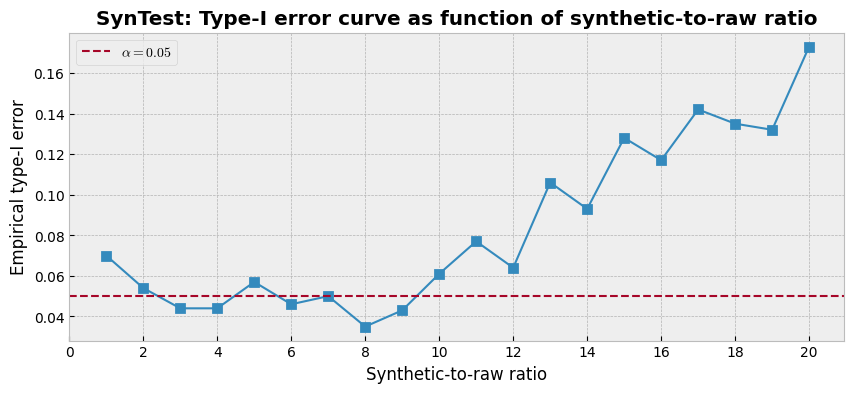

In [3]:
# SynTest: Type-I error curve as function of synthetic-to-raw ratio'

rho_list = np.array(list(result_dict_null.keys()), dtype=np.int32)


plt.style.use("bmh")

plt.figure(figsize=(10, 4))


plt.plot(
    rho_list,
    type_I_error_list,
    marker="s",
    mew=2,
    linestyle="-",
    markersize=6,
    linewidth=1.5,
)

plt.axhline(alpha, linestyle="--", color="C1", linewidth=1.5, label=r"$\alpha=0.05$")

plt.legend()

plt.xticks(ticks=np.arange(0, 21, 2))
plt.xlabel("Synthetic-to-raw ratio")


plt.ylabel("Empirical type-I error")

plt.title(r"SynTest: Type-I error curve as function of synthetic-to-raw ratio", fontweight="bold")


# Compare test statistics

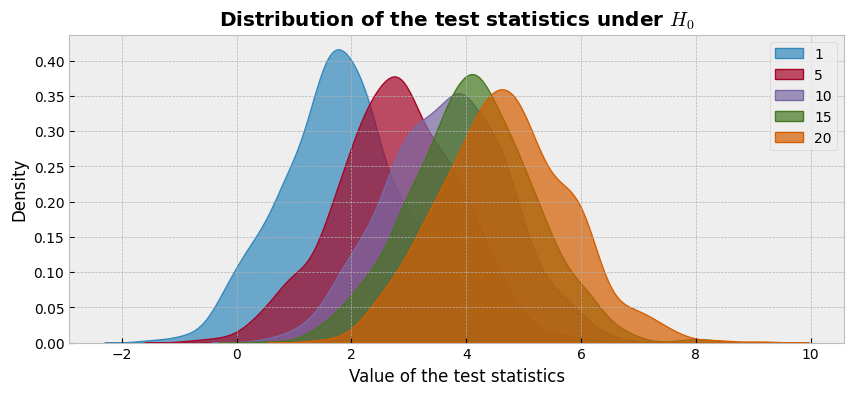

In [4]:
# distribution of the test statistics w.r.t. different ratios, under the NULL hypothesis

plt.figure(figsize=(10, 4))

for rho in [1, 5, 10, 15, 20]:
    temp_data = result_dict_null[str(rho)]["null_dist"]
    sns.kdeplot(temp_data, fill=True, label=str(rho), alpha = 0.7, common_grid=True, linewidth=1)

plt.xlabel("Value of the test statistics")
plt.title(r"Distribution of the test statistics under $H_0$", fontweight="bold")
plt.legend()

In [6]:
# distribution of the test statistics w.r.t. different ratios, under the TRUE distribution

# load the result dictionary
path_true_test_stat = "/home/liu00980/Documents/multimodal/tabular/tab-ddpm/pass-inference/syngen_inf_res/california_MedInc_true.pkl"
result_dict_true = pickle.load(open(path_true_test_stat, "rb"))


In [7]:
# load the inference dataset
path_twin_1 = "/home/liu00980/Documents/multimodal/tabular/tab-ddpm/data/california_twin_1"
path_twin_2 = "/home/liu00980/Documents/multimodal/tabular/tab-ddpm/data/california_twin_2"
df_twin_1 = concat_data(path_twin_1, num_features_list, cat_features_list, y_features_list)
df_twin_2 = concat_data(path_twin_2, num_features_list, cat_features_list, y_features_list)

df_inf = pd.concat([df_twin_1, df_twin_2], axis=0)
print(df_inf.shape)

(19814, 9)


In [18]:
test_stat = one_split_test_stat(
    df_twin_1,
    null_feature_name=null_feature_name,
    train_inf_ratio=0.8,
    cat_features_list=cat_features_list,
    y_features_list=y_features_list,
)
test_stat

# df_twin_1: 2.5664460570916
# df_twin_2: 3.1297175701210156
# df_inf: 2.968604601351169

2.5664460570916

In [ ]:
# investigate the following observation: (using df_twin_1)
# under the same size, the test statistic from the learned true distribution is significantly larger than the one from the true data

In [20]:
np.mean(np.array(result_dict_null["1"]["null_dist"]) >= 2.5664460570916) # not even significant

0.202

In [21]:
df_type_i = concat_data(
    NULL_DATA_PATH_TYPE_I, num_features_list, cat_features_list, y_features_list
)  # (99070000 * 2, 9)
df_inf_fake = df_type_i.sample(n=df_inf.shape[0], replace=False, random_state=0)

In [26]:
test_stat = one_split_test_stat(
    df_inf_fake,
    null_feature_name=null_feature_name,
    train_inf_ratio=0.8,
    cat_features_list=cat_features_list,
    y_features_list=y_features_list,
)
test_stat

8.18642932387643

In [40]:
np.array(result_dict_true["1"]["true_test_stat"]).min()

3.5108302877597546